In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('bigmart_train.csv')

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [8]:
train['outlet_age'] = 2024 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [9]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
train.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_age
count,7060.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29,26.17
std,4.64,0.05,62.28,8.37,1706.50,8.37
min,4.56,0.00,31.29,1985.00,33.29,15.00
25%,8.77,0.03,93.83,1987.00,834.25,20.00
50%,12.60,0.05,143.01,1999.00,1794.33,25.00
75%,16.85,0.09,185.64,2004.00,3101.30,37.00
max,21.35,0.33,266.89,2009.00,13086.96,39.00


In [11]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [12]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
train['Outlet_Size'].mode()[0]

'Medium'

In [14]:
#missing value imputation
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

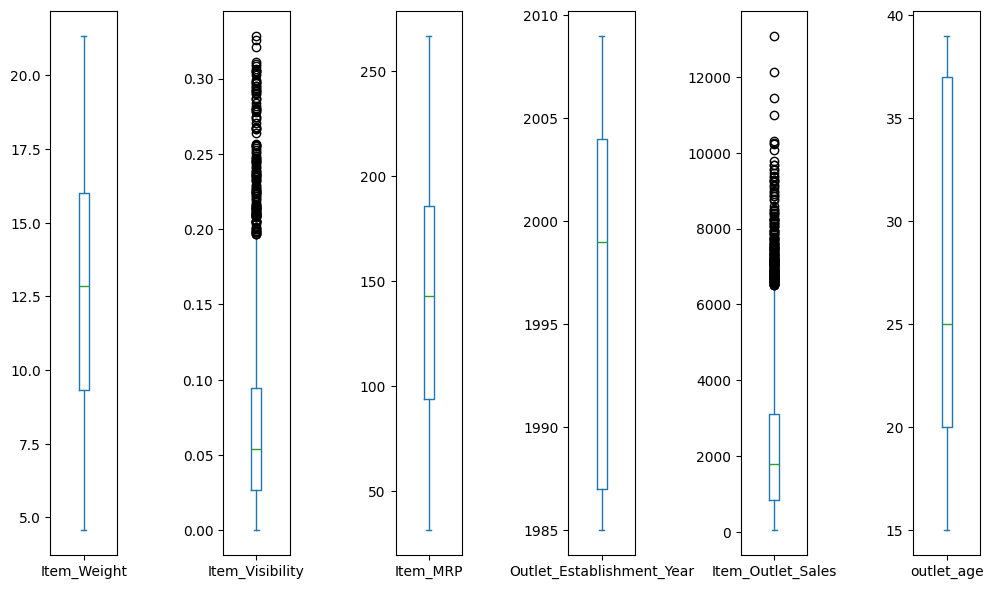

In [15]:
#checking outliers and dropping it
train.plot(kind='box', subplots=True, figsize=(10,6));
plt.tight_layout();

<Axes: >

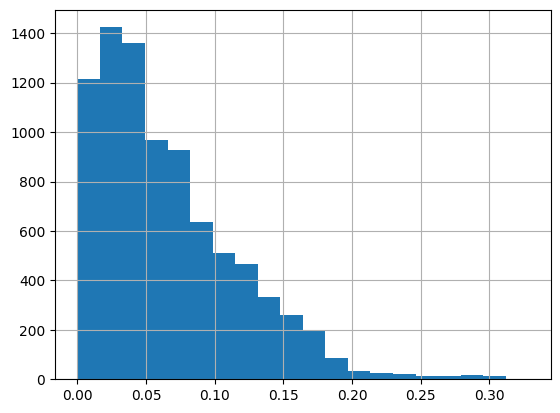

In [16]:
train['Item_Visibility'].hist(bins=20)

In [17]:
q1, q3 = train['Item_Visibility'].quantile([0.25,0.75])
IQR = q3 - q1
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR
filt = (train['Item_Visibility'] < UL) & (train['Item_Visibility'] > LL)
filt_train = train[filt]

In [18]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [19]:
train_new = filt_train
train_new.shape

(8379, 13)

In [20]:
#converting item visibility bins to categorical features
train_new['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.104784      2
0.102941      2
0.112399      2
           ... 
0.094450      1
0.016687      1
0.127470      1
0.012741      1
0.016760      1
Name: count, Length: 7736, dtype: int64

In [21]:
#coverting bins continuous to categorical values
train_new['Item_Visibility_bins'] = pd.cut(train_new['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [22]:
train_new['Item_Visibility_bins'].value_counts()

Item_Visibility_bins
Low Viz     4403
Viz         2557
High Viz     893
Name: count, dtype: int64

In [23]:
#replacing missing values with low visibility
train_new['Item_Visibility_bins'] = train_new['Item_Visibility_bins'].fillna('Low Viz')

In [24]:
train_new['Item_Fat_Content'] = train_new['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')

In [25]:
train_new['Item_Fat_Content'] = train_new['Item_Fat_Content'].replace('reg', 'Regular')

In [26]:
train_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,26,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,Low Viz


In [27]:
#encode text values into categorical features
le = LabelEncoder()
train_new['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
train_new['Item_Fat_Content'] = le.fit_transform(train_new['Item_Fat_Content'])

In [29]:
train_new['Item_Visibility_bins'] = le.fit_transform(train_new['Item_Visibility_bins'])

In [30]:
train_new['Outlet_Size'] = le.fit_transform(train_new['Outlet_Size'])

In [31]:
train_new['Outlet_Location_Type'] = le.fit_transform(train_new['Outlet_Location_Type'])

In [32]:
#creating dummies for outlet type
train_new = pd.get_dummies(train_new, columns=['Outlet_Type'])

In [33]:
train_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_age,Item_Visibility_bins,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,3735.1380,25,1,False,True,False,False
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,443.4228,15,1,False,False,True,False
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,2097.2700,25,1,False,True,False,False
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,732.3800,26,1,True,False,False,False
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,994.7052,37,1,False,True,False,False


In [34]:
train_new.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Fat_Content                   int64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Outlet_Size                        int64
Outlet_Location_Type               int64
Item_Outlet_Sales                float64
outlet_age                         int64
Item_Visibility_bins               int64
Outlet_Type_Grocery Store           bool
Outlet_Type_Supermarket Type1       bool
Outlet_Type_Supermarket Type2       bool
Outlet_Type_Supermarket Type3       bool
dtype: object

In [35]:
#dropping unusefull features
train_new = train_new.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [36]:
train_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'outlet_age', 'Item_Visibility_bins', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [37]:

train_new.isnull().sum()

Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility                  0
Item_MRP                         0
Outlet_Size                      0
Outlet_Location_Type             0
Item_Outlet_Sales                0
outlet_age                       0
Item_Visibility_bins             0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

In [38]:
#Linear Regression Modeling
X = train_new.drop('Item_Outlet_Sales', axis=1)
y = train_new.Item_Outlet_Sales

In [39]:
test = pd.read_csv('bigmart_test.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [40]:
test[ 'Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [41]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [42]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low Viz')

In [43]:
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [44]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [45]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [46]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [47]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [48]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [49]:
test['outlet_age'] =  2024 - test['Outlet_Establishment_Year']

In [50]:
test = pd.get_dummies(test, columns=['Outlet_Type'])

In [51]:
X_test = test.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [52]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'outlet_age',
        'Item_Visibility_bins', 'Outlet_Type_Grocery Store',
        'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
        'Outlet_Type_Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'outlet_age', 'Outlet_Type_Grocery Store',
        'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
        'Outlet_Type_Supermarket Type3'],
       dtype='object'))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_)
lin_reg.intercept_

[    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]


np.float64(-179.84963436641647)

In [56]:
prediction = lin_reg.predict(X_test)

In [58]:
print(np.sqrt(mean_squared_error(y_test, prediction)))

1118.41605258575


In [59]:
r2_test = r2_score(y_test, prediction)
r2_test

0.5486140031569204

In [62]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
ridge_prediction = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_prediction))
ridge_r2 = r2_score(y_test, ridge_prediction)
ridge_rmse, ridge_r2

(np.float64(1118.4160246364447), 0.5486140257172636)

In [63]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso_prediction = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_prediction))
lasso_r2 = r2_score(y_test, lasso_prediction)
lasso_rmse, lasso_r2

(np.float64(1118.4163920007873), 0.5486137291851408)

In [64]:
elastic_net = ElasticNet(alpha=0.001)
elastic_net.fit(X_train, y_train)
elastic_net_prediction = elastic_net.predict(X_test)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_prediction))
elastic_net_r2 = r2_score(y_test, elastic_net_prediction)
elastic_net_rmse, elastic_net_r2

(np.float64(1118.3366914585936), 0.5486780602320203)